In [9]:
import kbench
from xaosim.shmlib import shm
import numpy as np
import matplotlib.pyplot as plt
from time import sleep

chip = kbench.Chip(6)

/tmp/ipykernel_253200/3895357141.py:7: DeprecationWarning: Chip is deprecated, use Arch instead
  chip = kbench.Chip(6)


In [10]:
channel = 17
current = 300 # mA
tension = 10 # V

CUR = current * 65535 / 300
VOLT = tension * 65535 / 40

In [11]:
chip = kbench.classes.photonic_chip._xpow

In [12]:
chip.send_command(f"CH:{channel}-{channel}:CUR:{int(CUR)}")

'CH:17-17:CUR:65535\t>> Channel 17-17 set to 65535'

In [13]:
chip.send_command(f"CH:{channel}-{channel}:VOLT:{int(VOLT)}")

'CH:17-17:VOLT:16383\t>> Channel 17-17 set to 16383'

In [14]:
chip.send_command(f"CH:{channel}:VAL?")

'CH:17:VAL?\t>> Channel 17 = 9.987V, 13.687mA'

/tmp/ipykernel_253200/1182371098.py:1: DeprecationWarning: Channel is deprecated, use PhaseShifter instead
  channel = kbench.Channel(17)


[ 0.     1.319  2.693  4.067  5.442  6.843  8.246  9.592 10.939 12.341
 13.632 15.007 16.326 17.729 19.047 20.367 21.714 23.006 24.352 25.672
 26.991 28.339 29.685 31.032 32.324 33.698 35.072 36.474 37.849 39.195
 40.598] [ 0.     1.003  1.997  2.996  3.995  4.993  5.992  6.991  7.99   8.988
  9.988 10.985 11.986 12.985 13.981 14.983 15.982 16.978 17.978 18.977
 19.976 20.976 21.975 22.972 23.972 24.971 25.968 26.97  27.97  28.962
 29.972] [0.         0.00132296 0.00537792 0.01218473 0.02174079 0.0341671
 0.04941003 0.06705767 0.08740261 0.11092091 0.13615642 0.16485189
 0.19568344 0.23021106 0.26629611 0.30515876 0.34703315 0.39059587
 0.43780026 0.48717754 0.53917222 0.59443886 0.65232788 0.7128671
 0.77487093 0.84147276 0.9107497  0.98370378 1.05863653 1.13516559
 1.21680326]


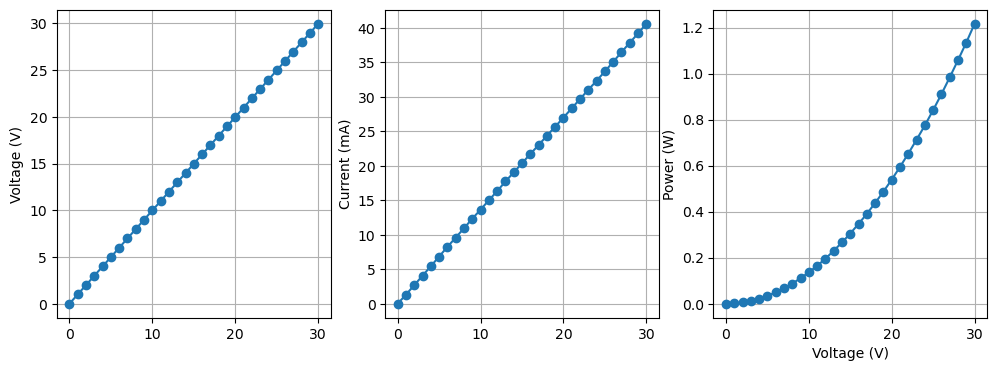

In [15]:
channel = kbench.Channel(17)

volt_range = np.linspace(0,30,31)

channel.set_current(300)

real_voltage = np.empty_like(volt_range)
real_current = np.empty_like(volt_range)

for i, v in enumerate(volt_range):
    channel.set_voltage(v)
    real_voltage[i] = channel.get_voltage()
    real_current[i] = channel.get_current()

real_power = real_voltage * real_current / 1000 # mW to W

print(real_current, real_voltage, real_power)

fig, axs = plt.subplots(1,3, figsize=(12,4))
axs[0].plot(volt_range, real_voltage, '-o')
axs[0].set_ylabel("Voltage (V)")
axs[0].grid()

axs[1].plot(volt_range, real_current, '-o')
axs[1].set_ylabel("Current (mA)")
axs[1].grid()

axs[2].plot(volt_range, real_power, '-o')
axs[2].set_ylabel("Power (W)")
axs[2].set_xlabel("Voltage (V)")
axs[2].grid()
plt.show()

🔧 Calibrating channel 17 using 2-point measurement...
📤 XPOW TX: 'CH:17:CUR:65535'
📥 Output disabled
📤 XPOW TX: 'CH:17:VOLT:1638'
📥 Output disabled
📤 XPOW TX: 'CH:17:VAL?'
📥 XPOW RX: 'CH:17:VAL?	>> Channel 17 = 1.005V, 1.319mA'
📤 XPOW TX: 'CH:17:VAL?'
📥 XPOW RX: 'CH:17:VAL?	>> Channel 17 = 1.008V, 1.319mA'
📤 XPOW TX: 'CH:17:VOLT:49151'
📥 Output disabled
📤 XPOW TX: 'CH:17:VAL?'
📥 XPOW RX: 'CH:17:VAL?	>> Channel 17 = 29.971V, 40.625mA'
📤 XPOW TX: 'CH:17:VAL?'
📥 XPOW RX: 'CH:17:VAL?	>> Channel 17 = 29.973V, 40.598mA'
✅ Channel 17 calibrated: slope=0.001356
📤 XPOW TX: 'CH:17:CUR:0'
📥 Output disabled
📤 XPOW TX: 'CH:17:VOLT:0'
📥 Output disabled
✅ Channel 17 turned off.
[ 0.     6.788  9.62  11.764 13.551 15.117 16.574 17.866 19.075 20.23
 21.274 22.291 23.253 24.187 25.094 25.946 26.744 27.596 28.366 29.136
 29.878 30.62  31.362 32.048 32.709 33.423 34.083 34.742 35.375 36.062
 36.667] [1.0000e-03 4.9510e+00 7.0020e+00 8.5770e+00 9.9050e+00 1.1073e+01
 1.2128e+01 1.3101e+01 1.4007e+01 1.4853

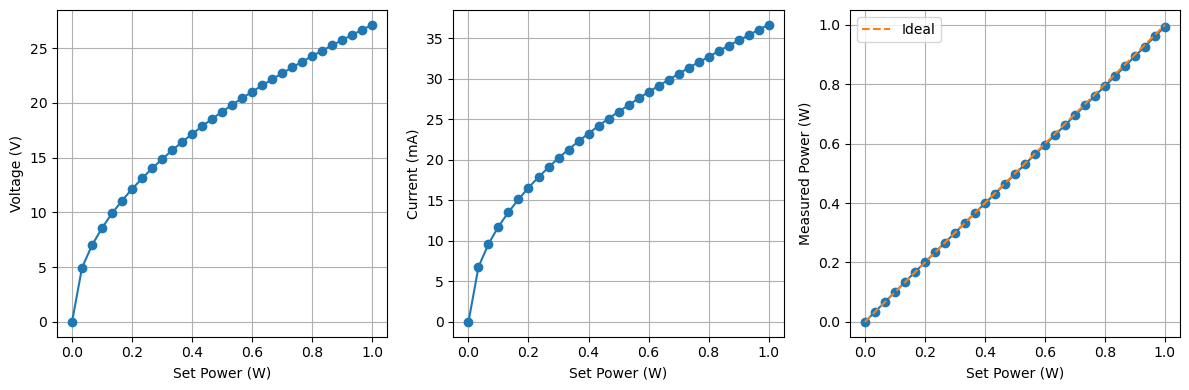

In [16]:
# Test the new set_power() method with auto-calibration
channel = kbench.PhaseShifter(17)

channel.calibrate(verbose=True)

power_range = np.linspace(0, 1, 31)

real_voltage = np.empty_like(power_range)
real_current = np.empty_like(power_range)
real_power = np.empty_like(power_range)

for i, p in enumerate(power_range):
    channel.set_power(p)
    real_voltage[i] = channel.get_voltage()
    real_current[i] = channel.get_current()
    real_power[i] = channel.get_power()

print(real_current, real_voltage, real_power)

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].plot(power_range, real_voltage, '-o')
axs[0].set_ylabel("Voltage (V)")
axs[0].set_xlabel("Set Power (W)")
axs[0].grid()

axs[1].plot(power_range, real_current, '-o')
axs[1].set_ylabel("Current (mA)")
axs[1].set_xlabel("Set Power (W)")
axs[1].grid()

axs[2].plot(power_range, real_power, '-o')
axs[2].plot(power_range, power_range, '--', label='Ideal')
axs[2].set_ylabel("Measured Power (W)")
axs[2].set_xlabel("Set Power (W)")
axs[2].legend()
axs[2].grid()
plt.tight_layout()
plt.show()


In [17]:
def crop_frames(datacube, crop_coords):
    """
    Crop frames in a datacube.
    The datacube must be of at least 3 dimensions.

    Parameters
    ----------
    datacube : nd-array
        Datacube to crop.
    crop_coords : list-like
        Coordinates to crop.

    Returns
    -------
    cropped_cube : nd-array
        Cropped datacube of shape(..., nb of regions, y-size of subframes, x-size of subframes).

    """
    crop_coords = np.array(crop_coords)
    datacube_t = np.transpose(datacube) # Put frames on the first 2 axes
    
    cropped_cube = []
    for i in range(crop_coords.shape[0]):
        cropx, cropy = crop_coords[i]
        out = datacube_t[cropx[0]:cropx[1],cropy[0]:cropy[1]]
        cropped_cube.append(out)
        
    cropped_cube = np.array(cropped_cube)
    cropped_cube = np.transpose(cropped_cube) # Revert to original axes order
    cropped_cube = np.moveaxis(cropped_cube, [-3, -2, -1], [-2, -1, -3]) # Put frames on the last 2 axes
    
    return cropped_cube

crop_size = 10 # px window around the output
crop_centers = np.array([(319, 311),
                        (352, 311),
                        (385, 311),
                        (417, 311),
                        (11, 11)])

crop_coords = [((crop_centers[0,0]-crop_size//2, crop_centers[0,0]+crop_size//2+1), (crop_centers[0,1]-crop_size//2, crop_centers[0,1]+crop_size//2+1)), 
               ((crop_centers[1,0]-crop_size//2, crop_centers[1,0]+crop_size//2+1), (crop_centers[1,1]-crop_size//2, crop_centers[1,1]+crop_size//2+1)),
               ((crop_centers[2,0]-crop_size//2, crop_centers[2,0]+crop_size//2+1), (crop_centers[2,1]-crop_size//2, crop_centers[2,1]+crop_size//2+1)),
               ((crop_centers[3,0]-crop_size//2, crop_centers[3,0]+crop_size//2+1), (crop_centers[3,1]-crop_size//2, crop_centers[3,1]+crop_size//2+1))] # [((x1, x2), (y1, y2))]*4


In [18]:
def get_frame(cam, semid):
    """
    Grab frame from the shared memory and correct for the dark.
    It uses the semaphores to take the frame right after a tip-tilt
    position is send to the DM.

    Parameters
    ----------
    cam : obj
        Shared memory instance of the camera.
    semid : int
        Semaphore value.

    Returns
    -------
    img : 2d-array
        Frame corrected from dark.

    """
    img = cam.get_latest_data(semid)
    
    return img

cam = shm('/dev/shm/cred1.im.shm', nosem=False) # the source of data
semid = 0
cam.catch_up_with_sem(semid)

dk = shm('/dev/shm/cred3_dark.im.shm')
dark = dk.get_latest_data()

(101, 4)


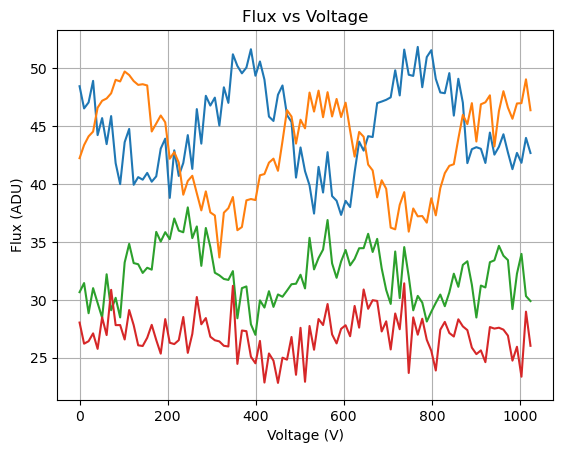

In [31]:
sleep(10)
wait = 0.001
ramp = np.linspace(0, 32**2, 101)
datacube = []
channel = 17
for v in ramp:
    VOLT = np.sqrt(v) * 65535 / 40
    #chip.send_command(f"CH:{channel}-{channel}:CUR:{int(CUR)}")
    chip.send_command(f"CH:{channel}-{channel}:VOLT:{int(VOLT)}")
    sleep(wait)
    #print(chip.send_command(f"CH:{channel}:VAL?"))
    img0 = get_frame(cam, semid)
    img0 = img0 - dark
    datacube.append(img0)

datacube = np.array(datacube)
cropped_cube = crop_frames(datacube, crop_coords)
flux = np.mean(cropped_cube, axis=(-1, -2))

print(np.array(flux).shape)

plt.figure()
plt.plot(ramp, flux)
plt.xlabel("Voltage (V)")
plt.ylabel("Flux (ADU)")
plt.title("Flux vs Voltage")
plt.grid()
plt.show()

Cred3 camera initialized with dark subtraction
(101, 4)


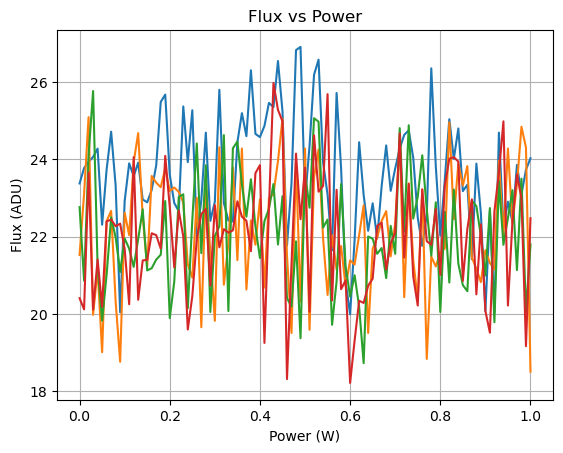

In [29]:
ramp = np.linspace(0, 1, 101)
flux = []
channel = kbench.PhaseShifter(17)
cred3 = kbench.Cred3()
for p in ramp:
    channel.set_power(p)
    flux.append(cred3.get_outputs(crop_centers=crop_centers[:4]))

print(np.array(flux).shape)

plt.figure()
plt.plot(ramp, flux)
plt.xlabel("Power (W)")
plt.ylabel("Flux (ADU)")
plt.title("Flux vs Power")
plt.grid()
plt.show()

In [20]:
print(cropped_cube.shape)

(101, 4, 11, 11)
